
# ML - Linear Models


In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np



All linear models learn coeff_ and intercept_ to make predictions.

__y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept___

The differences between models is all about penalty and restrictions are put on coef_. The classical "linear model" is in fact 'ordinary least square regression'.

In [3]:
from sklearn.datasets import make_regression
from sklearn.cross_validation import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True)
print('True coefficients:', true_coefficient)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)
print('X shape:', X.shape)
print('X_train shape:', X_train.shape)
print(y_train.shape)

True coefficients: [ 10.77701506  78.0708757    0.          49.42954411   0.           0.           0.
   0.           0.           0.          22.19773      0.           0.           0.
   0.           0.           0.          91.72128333   0.          84.74365342
   0.           0.          39.25718416  65.87456029   0.           0.           0.
  57.60535243  17.25415087   0.        ]
X shape: (200, 30)
X_train shape: (60, 30)
(60,)


## Linear regression
[A nice introduction in French](http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-l-inf-regsim)


$\min{w,b}\sum{i}{x}$

In [4]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print('R^2 on training set: ', linear_regression.score(X_train, y_train))
print('R^2 on test set: ', linear_regression.score(X_test, y_test))

R^2 on training set:  0.884137186644
R^2 on test set:  0.282449236005


In [5]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.694701185216


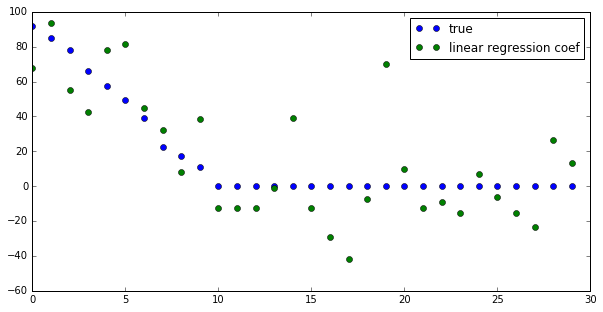

In [6]:
plt.figure(figsize=(10,5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], 'o', label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], 'o', label='linear regression coef')
plt.legend()

training set size :  [ 13  43  73 103 133]


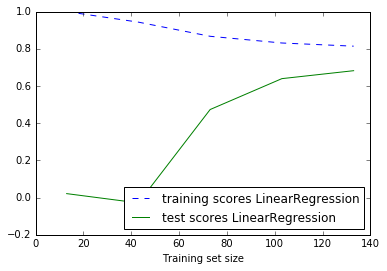

If alpha = 0, it act exactly as linear regression
training set size :  [ 13  43  73 103 133]


C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


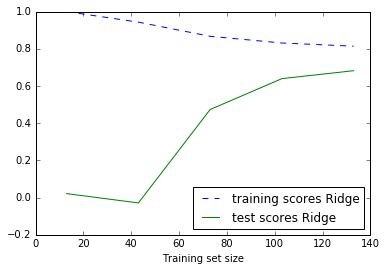

If alpha > 0, the minimization tries also to minimize the coeff (the idea is to get rid of all useless features)
training set size :  [ 13  43  73 103 133]


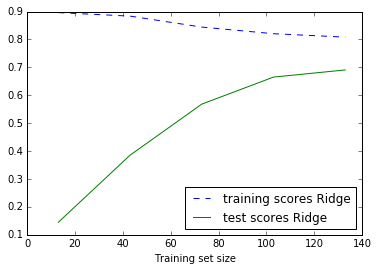

In [7]:
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import Ridge

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y)
    print('training set size : ', training_set_size)
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label = 'training scores ' +  estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label='test scores ' + estimator_name)
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim =(-0.1, 1.1)

plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plt.show()
print('If alpha = 0, it act exactly as linear regression')
plot_learning_curve(Ridge(alpha=0), X, y)
plt.show()

print('If alpha > 0, the minimization tries also to minimize the coeff (the idea is to get rid of all useless features)')
plot_learning_curve(Ridge(alpha=10), X, y)
    

## Ridge regression (L2 Penalty)
Ridge estimator is a regularization of the LinearRegression.
The amount of regularization is set via alpha

([<matplotlib.axis.XTick at 0x1c0a3d7f710>,
 <a list of 5 Text xticklabel objects>)

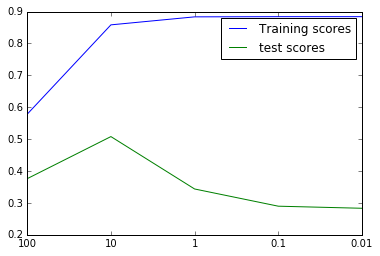

In [8]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .1, .01]:
    ridge=Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge
    
plt.figure()
plt.plot(training_scores, label='Training scores')
plt.plot(test_scores, label='test scores')

plt.legend(loc="best")
plt.xticks(range(5), [100, 10, 1, .1, .01])

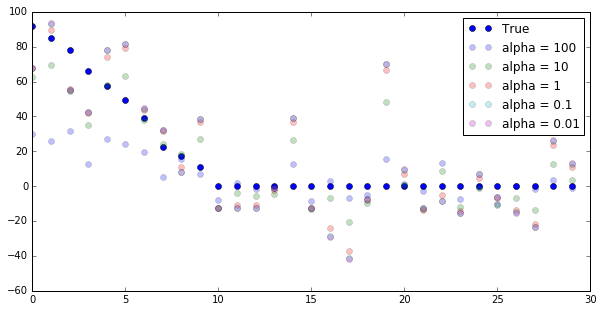

In [9]:
plt.figure(figsize=(10,5))
plt.plot(true_coefficient[coefficient_sorting], 'o', label='True', c='b')
for i, alpha in enumerate([100, 10, 1, .1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], 'o', label='alpha = {}'.format(alpha), alpha=0.25)
plt.legend(loc='best')


training set size :  [ 13  43  73 103 133]
training set size :  [ 13  43  73 103 133]


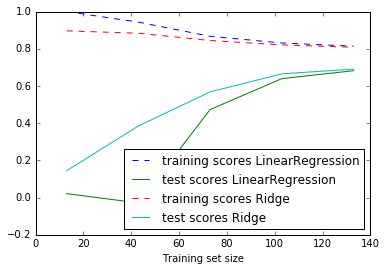

In [10]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

### LASSO (L1 Penalty)

$\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\norm}[1]{\lVert#1\rVert}
\displaystyle min_{w,b} \sum_{i} \norm{w^{T}x_{i} + b - y_{i}}^{2} + \alpha\norm{w}$

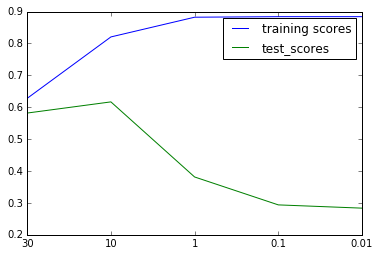

In [19]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []
alphas = [30, 10, 1, .1, .01]

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso

plt.figure()
plt.plot(training_scores, label='training scores')
plt.plot(test_scores, label='test_scores')
plt.xticks(range(len(alphas)), alphas)
plt.legend(loc='best')
plt.show()


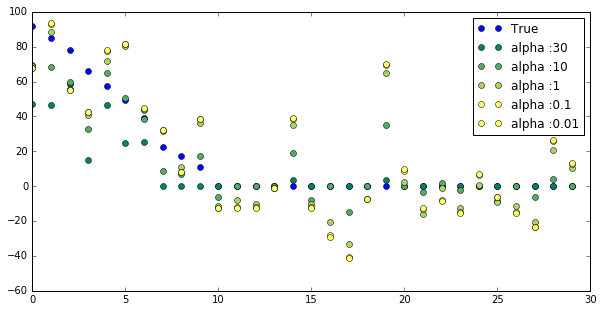

In [27]:
plt.figure(figsize=(10,5))
plt.plot(true_coefficient[coefficient_sorting], 'o', label="True", c='b')

for i, alpha in enumerate(alphas):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], 'o', label="alpha :{}".format(alpha), c=plt.cm.summer(i/3))
    
plt.legend(loc='best')


training set size :  [ 13  43  73 103 133]
training set size :  [ 13  43  73 103 133]
training set size :  [ 13  43  73 103 133]


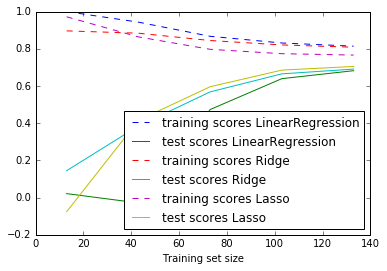

In [28]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)